In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

## Loading Dataset and Inferring Data to be "cleaned"

In [137]:
users_df = pd.read_csv("users.csv")
print(users_df.describe())
print("\n===========Dataframe Info===========\n")
print(users_df.info())


               age  monthly_spend  household_size
count  9071.000000    9283.000000     8755.000000
mean     35.039466      22.146445        2.863392
std      12.580667      65.723824        1.563251
min      -7.000000       0.110000        1.000000
25%      27.000000       7.745000        2.000000
50%      35.000000      13.530000        2.000000
75%      43.000000      21.620000        4.000000
max     109.000000     997.800000        8.000000

===========Dataframe Info===========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  10300 non-null  object 
 1   email                    10300 non-null  object 
 2   first_name               10300 non-null  object 
 3   last_name                10300 non-null  object 
 4   age                      9071 non-null   float64
 5   gender             

## Pre-Processing of Data
#### Handling Missing data and removal of redundant and non-valuable datapoints for easier analysis for the model

In [138]:
users_df = users_df.drop_duplicates(subset=['user_id'])
users_df.info()
# This helps us clear out redundant data in the dataset, for future references.

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  10000 non-null  object 
 1   email                    10000 non-null  object 
 2   first_name               10000 non-null  object 
 3   last_name                10000 non-null  object 
 4   age                      8806 non-null   float64
 5   gender                   9200 non-null   object 
 6   country                  10000 non-null  object 
 7   state_province           10000 non-null  object 
 8   city                     10000 non-null  object 
 9   subscription_plan        10000 non-null  object 
 10  subscription_start_date  10000 non-null  object 
 11  is_active                10000 non-null  bool   
 12  monthly_spend            9007 non-null   float64
 13  primary_device           10000 non-null  object 
 14  household_size           850

#### For easy usage, we convert dtype format of datetime from string to datetime using Pandas in-built function

In [139]:
users_df['subscription_start_date'] = pd.to_datetime(users_df['subscription_start_date'], errors='coerce')
users_df['created_at'] = pd.to_datetime(users_df['created_at'], errors='coerce')

#### In regards to privacy concerncs, we go ahead and remove any columns that have no concern over the the churn rate, and are strictly a confidential information, so we go ahead and remove these columns from the dataset.

In [140]:
col_to_rem = ['email', 'first_name', 'last_name', 'state_province']
clean_users = users_df.drop(columns=col_to_rem)
clean_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  10000 non-null  object        
 1   age                      8806 non-null   float64       
 2   gender                   9200 non-null   object        
 3   country                  10000 non-null  object        
 4   city                     10000 non-null  object        
 5   subscription_plan        10000 non-null  object        
 6   subscription_start_date  10000 non-null  datetime64[ns]
 7   is_active                10000 non-null  bool          
 8   monthly_spend            9007 non-null   float64       
 9   primary_device           10000 non-null  object        
 10  household_size           8500 non-null   float64       
 11  created_at               10000 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64

#### Next up is the null values, and how one can go ahead and fill these data in, without having any kind of diverse affect on the dataset's integrity and diversity of the data.

In [141]:
for i in clean_users:
    if(clean_users[i].isnull().sum())!=0:
        print(i+" Data Overview")
        print(clean_users[i].describe())
        print("\t")

age Data Overview
count    8806.000000
mean       35.033841
std        12.565910
min        -7.000000
25%        27.000000
50%        35.000000
75%        43.000000
max       109.000000
Name: age, dtype: float64
	
gender Data Overview
count       9200
unique         4
top       Female
freq        4203
Name: gender, dtype: object
	
monthly_spend Data Overview
count    9007.000000
mean       22.271220
std        66.135414
min         0.110000
25%         7.745000
50%        13.560000
75%        21.680000
max       997.800000
Name: monthly_spend, dtype: float64
	
household_size Data Overview
count    8500.000000
mean        2.865294
std         1.564278
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: household_size, dtype: float64
	


#### From the above code, the columns with null values are described, showing how a probable way to fill these methods can be achieved is also a inferrable if need be.
#### For example the "age" column, can be filled with mean values, but looking at the data inside, we can see that there are some outlier that need to be addressed before moving forward, such as the minimum age being 「-7」which is impossible, and not within the statue of limitation of the netflix user ratings set by the organization.

In [ ]:
# First Filling in the empty values, then move on to the cleaning of outliers to not lose more data due to conditional settings.
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

imput_df = users_df.loc[:, ["age", "household_size"]]

df_imputed = pd.DataFrame(imputer.fit_transform(imput_df), columns=imput_df.columns)

users_df.loc[:, ["age", "household_size"]] = df_imputed

#### As it can be seen, the mean value of the data has not changed, which in term means that the outlier have been removed, with little not effect on the dataset integrity overall

In [143]:
#Removal of Outliers
clean_users = clean_users[(clean_users['age'] > 13) & (clean_users['age'] <= 70)]
clean_users['age'].describe()

count    8431.000000
mean       35.866445
std        11.027140
min        14.000000
25%        28.000000
50%        35.000000
75%        43.000000
max        70.000000
Name: age, dtype: float64

#### Filling empty values of gender with the concept of "unknown" to be inclusive of gender diversity in this age and time

In [144]:
clean_users['gender'] = clean_users['gender'].fillna("Unknown")

#### Filling the leftover empty data of household size and monthly expenditure.

In [145]:
# Filling the household sizes of unknown users by getting the mode of the same subscription plan holding user's household size.
clean_users['household_size'] = clean_users.groupby('subscription_plan')['household_size'].transform(lambda x: x.fillna(x.mode()[0]))

# To fill the monthly spending column, we groupby the household size and get the mean to fill the NaN values.
clean_users['monthly_spend'] = clean_users.groupby('household_size')['monthly_spend'].transform(lambda x: x.fillna(x.mean()))


In [146]:
if not clean_users.isnull().sum().any():
    print("Data Cleaning Accomplished!")

Data Cleaning Accomplished!


## Feature Engineering
#### EDA pre-step

In [147]:
# Creation of the tuenure of usages, by setting the current day as the latest start of the subscription day.
tenure_d = clean_users['subscription_start_date'].max()
clean_users['tenure_days'] = (tenure_d - clean_users['subscription_start_date']).dt.days


In [148]:
# Set the churn status of the users, with 1 as churned or left, and 0 as still active.
clean_users['churn'] = clean_users['is_active'].apply(lambda x: 1 if x == False else 0)

In [149]:
#import the watch duration of each user accumulated through various sessions and continue to use that for function engineering.
watch_d = pd.read_csv("watch_history.csv")

In [ ]:
# Convert timestamp of the watchhistory dataset, that will further be used in the feature engineering aspect
watch_d['watch_date'] = pd.to_datetime(watch_d['watch_date'])
watch_d = watch_d[watch_d["watch_duration_minutes"] > 0]

In [151]:
engagement = watch_d.groupby("user_id").agg(
    total_watch_minutes=("watch_duration_minutes", "sum"),
    avg_session_minutes=("watch_duration_minutes", "mean"),
    median_session_minutes=("watch_duration_minutes", "median")
)
recency = watch_d.groupby("user_id").agg(last_watch=("watch_date", "max"),num_sessions=("session_id", "count"))
recency["days_since_last_watch"] = (pd.Timestamp.today() - recency["last_watch"]).dt.days

In [152]:
completion = watch_d.groupby("user_id").agg(
    avg_progress=("progress_percentage", "mean"),
    completion_rate=("progress_percentage", lambda x: (x > 90).mean())
)


In [ ]:
master_dat = (clean_users
              .merge(engagement, on="user_id", how="left")
              .merge(recency, on="user_id", how="left")    
              .merge(completion, on="user_id", how="left"))

In [156]:
master_dat["watch_per_day"] = master_dat["total_watch_minutes"] / (master_dat["tenure_days"] + 1)
master_dat["value_ratio"] = master_dat["total_watch_minutes"] / (master_dat["monthly_spend"] + 1)

In [159]:
master_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  8431 non-null   object        
 1   age                      8431 non-null   float64       
 2   gender                   8431 non-null   object        
 3   country                  8431 non-null   object        
 4   city                     8431 non-null   object        
 5   subscription_plan        8431 non-null   object        
 6   subscription_start_date  8431 non-null   datetime64[ns]
 7   is_active                8431 non-null   bool          
 8   monthly_spend            8431 non-null   float64       
 9   primary_device           8431 non-null   object        
 10  household_size           8431 non-null   float64       
 11  created_at               8431 non-null   datetime64[ns]
 12  tenure_days              8431 non-

## EDA
#### Sanity Check on the dataset's churn rate, with a base rate of less than 5% a bit impossible

In [179]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [160]:
master_dat["churn"].value_counts(normalize=True)

churn
0    0.851975
1    0.148025
Name: proportion, dtype: float64

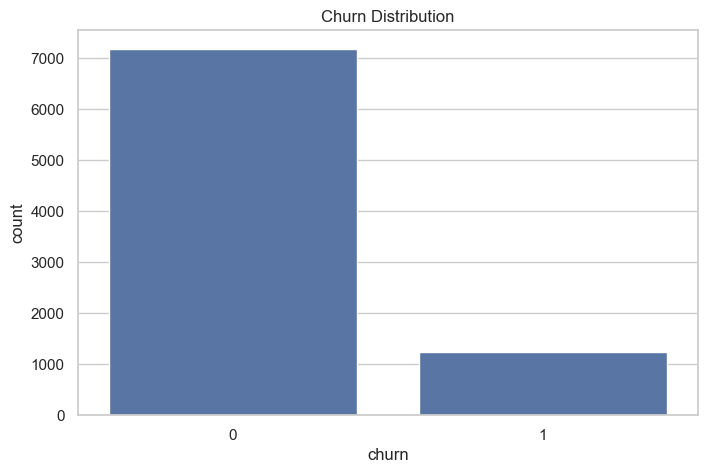

In [181]:
sns.countplot(data=master_dat, x="churn")
plt.title("Churn Distribution")
plt.show()

#### Cross-check churning and activity status

In [ ]:
pd.crosstab(master_dat["churn"], master_dat["is_active"], normalize="index")

#Shows no  label leakage or definition error of churn status in the dataset.

is_active,False,True
churn,,
0,0.0,1.0
1,1.0,0.0


#### Age vs Churn 

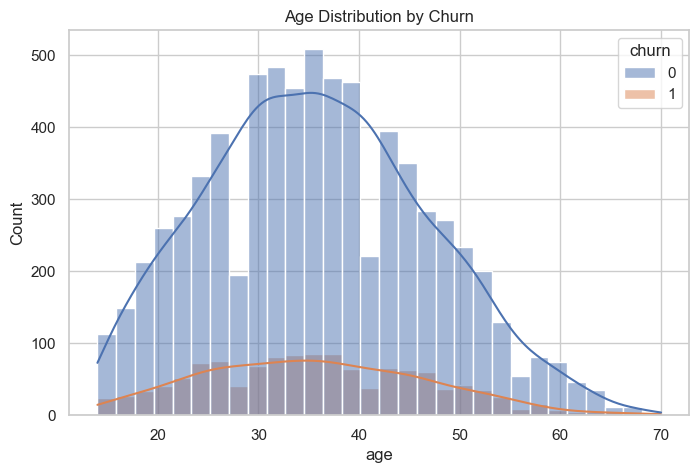

In [184]:
sns.histplot(data=master_dat, x="age", hue="churn", bins=30, kde=True)
plt.title("Age Distribution by Churn")
plt.show()

#### Gender vs Churn

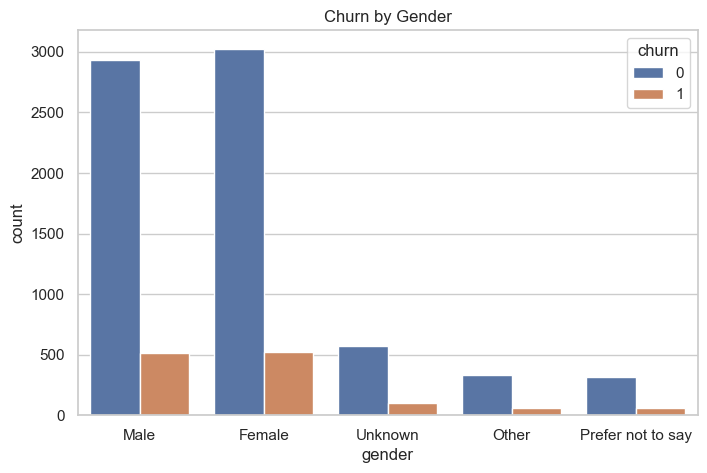

In [185]:
sns.countplot(data=master_dat, x="gender", hue="churn")
plt.title("Churn by Gender")
plt.show()

#### Household size vs churn

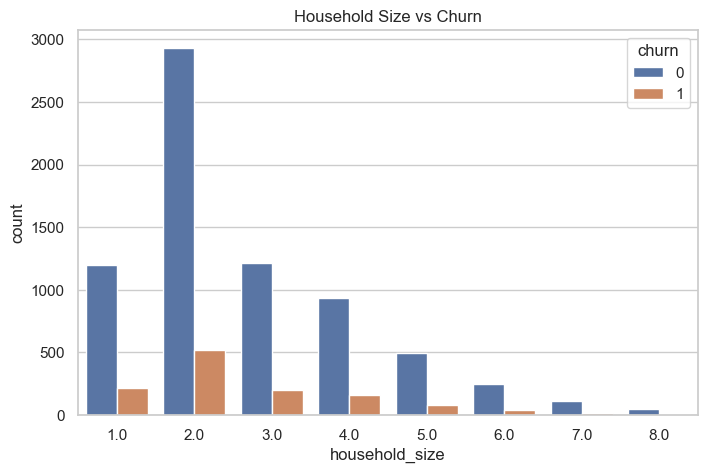

In [188]:
sns.countplot(data=master_dat, hue="churn", x="household_size")
plt.title("Household Size vs Churn")
plt.show()


#### Subscription vs Value

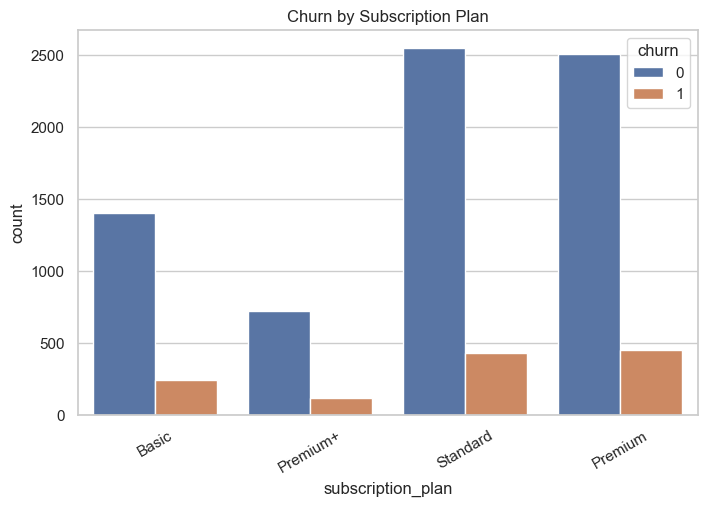

In [189]:
sns.countplot(data=master_dat, x="subscription_plan", hue="churn")
plt.title("Churn by Subscription Plan")
plt.xticks(rotation=30)
plt.show()

#### Expenses vs Churn

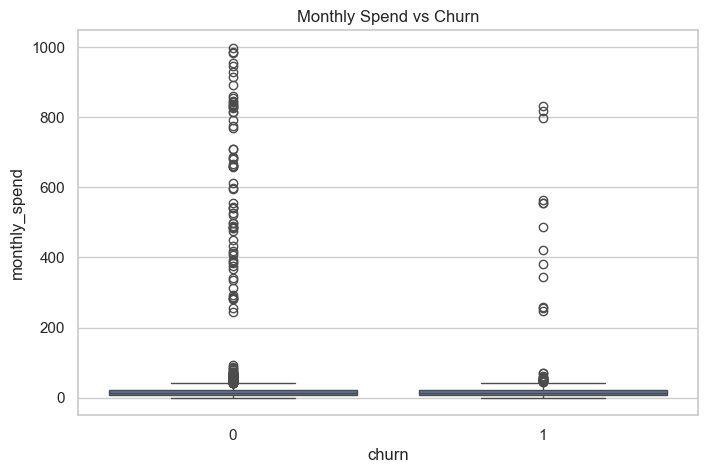

In [192]:
sns.boxplot(data=master_dat, x="churn", y="monthly_spend")
plt.title("Monthly Spend vs Churn")
plt.show()

#### Engagement Function and how it affects the churn

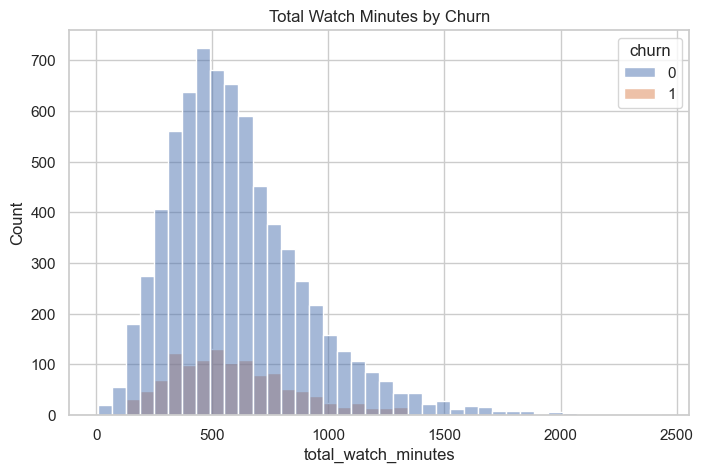

In [195]:
sns.histplot(data=master_dat, x="total_watch_minutes", hue="churn", bins=40)
plt.title("Total Watch Minutes by Churn")
plt.show()

#### Last inactive vs churn

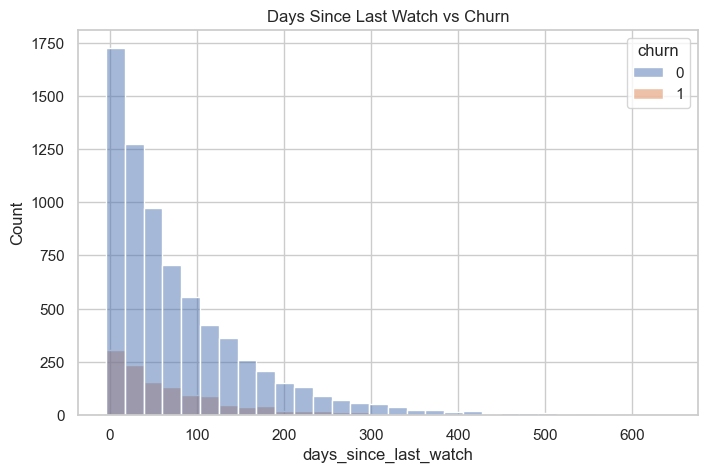

In [199]:
sns.histplot(data=master_dat, x="days_since_last_watch", hue="churn", bins=30)
plt.title("Days Since Last Watch vs Churn")
plt.show()

#### Churn vs the month recorded

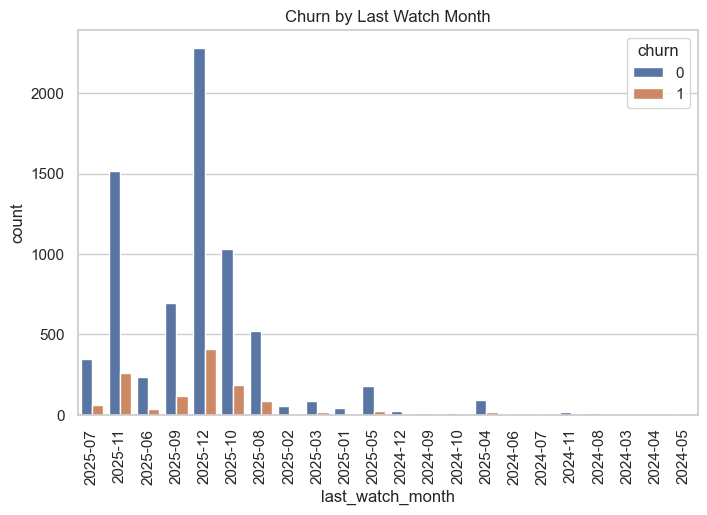

In [200]:
master_dat['last_watch_month'] = master_dat['last_watch'].dt.to_period("M")

sns.countplot(data=master_dat, x="last_watch_month", hue="churn")
plt.xticks(rotation=90)
plt.title("Churn by Last Watch Month")
plt.show()

#### Let us see the correlation feature map of the entire dataset at hand

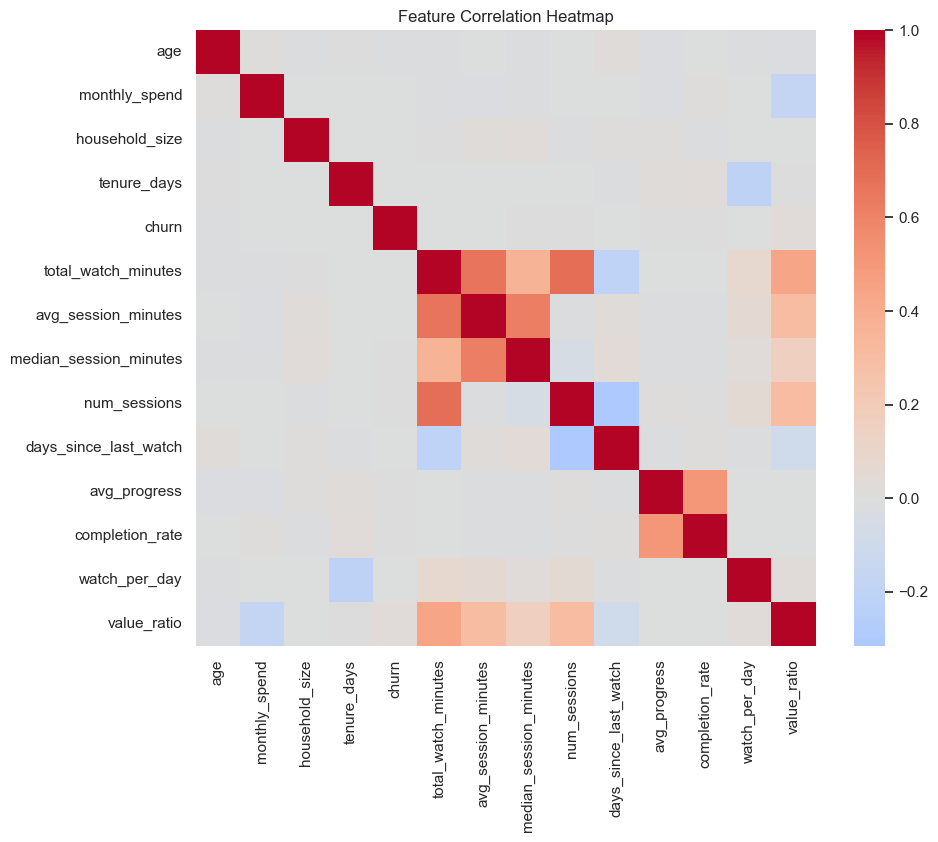

In [202]:
num_cols = master_dat.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10,8))
sns.heatmap(master_dat[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


#### From the correlation heatmap, we can dwindle down our candidates for churn driver, for now, let us continue moving forward with "days_since_last_watch", "watch_per_day", "completion_rate", "value_ratio"

#### Bucketing Continuous Features

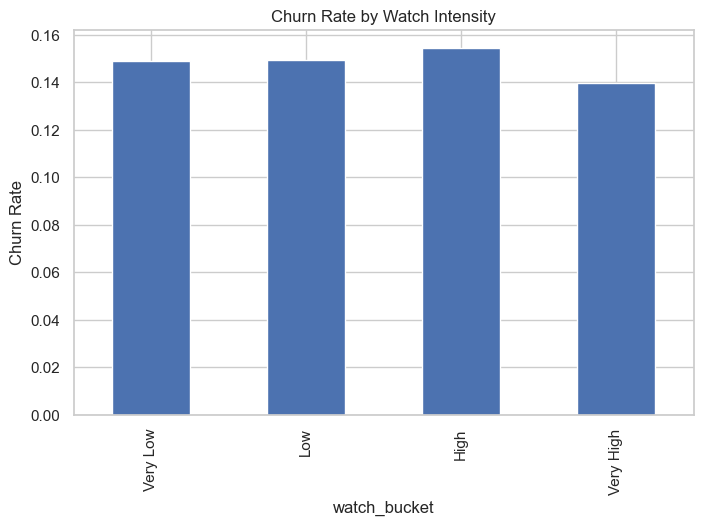

In [205]:
master_dat["watch_bucket"] = pd.qcut(
    master_dat["watch_per_day"],
    q=4,
    labels=["Very Low", "Low", "High", "Very High"]
)

master_dat.groupby("watch_bucket")["churn"].mean().plot(kind="bar")
plt.title("Churn Rate by Watch Intensity")
plt.ylabel("Churn Rate")
plt.show()

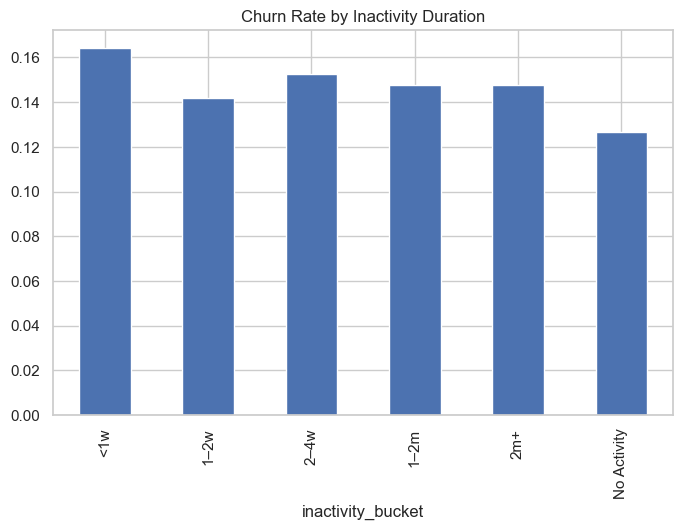

In [219]:
# Inactivity Bucket
master_dat["inactivity_bucket"] = pd.cut(
    master_dat["days_since_last_watch"],
    bins=[0,7,14,30,60,999],
    labels=["<1w","1–2w","2–4w","1–2m","2m+"]
)
master_dat["inactivity_bucket"] = master_dat["inactivity_bucket"].cat.add_categories("No Activity")
master_dat["inactivity_bucket"] = master_dat["inactivity_bucket"].fillna("No Activity")

master_dat.groupby("inactivity_bucket")["churn"].mean().plot(kind="bar")
plt.title("Churn Rate by Inactivity Duration")
plt.show()


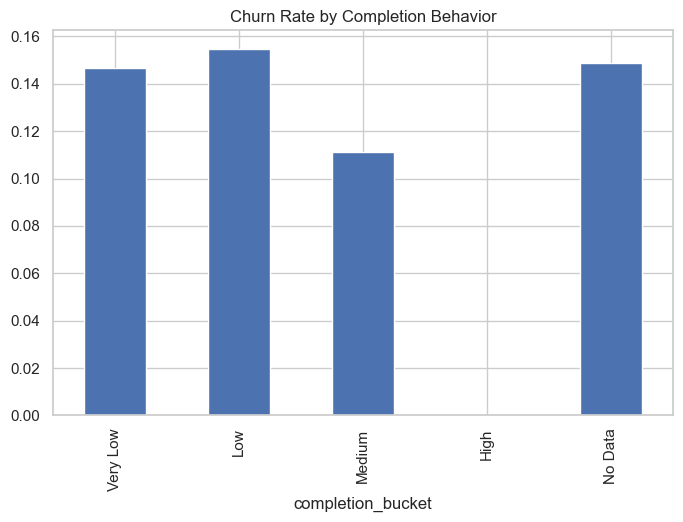

In [220]:
# Completeion Bucket
master_dat["completion_bucket"] = pd.cut(
    master_dat["completion_rate"],
    bins=[0,0.3,0.6,0.9,1.0],
    labels=["Very Low","Low","Medium","High"]
)

master_dat["completion_bucket"] = master_dat["completion_bucket"].cat.add_categories("No Data")
master_dat["completion_bucket"] = master_dat["completion_bucket"].fillna("No Data")

master_dat.groupby("completion_bucket")["churn"].mean().plot(kind="bar")
plt.title("Churn Rate by Completion Behavior")
plt.show()

#### Driver Ranking for Churn

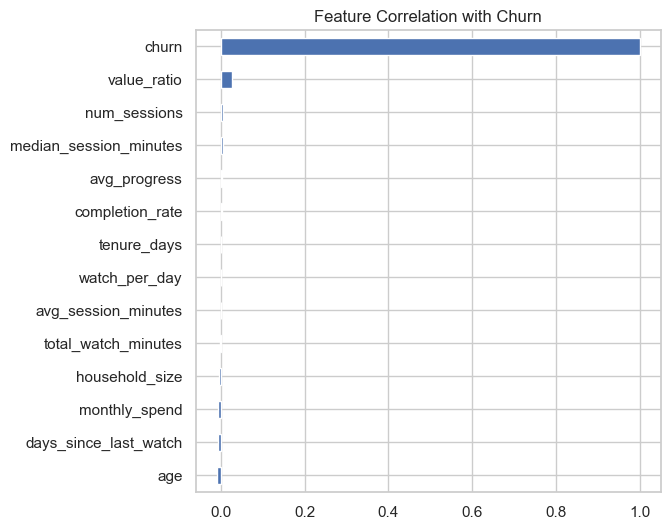

In [221]:
churn_corr = (
    master_dat[num_cols]
    .corr()["churn"]
    .sort_values()
)

churn_corr.plot(kind="barh", figsize=(6,6))
plt.title("Feature Correlation with Churn")
plt.show()

#### Interaction Effects for Insight

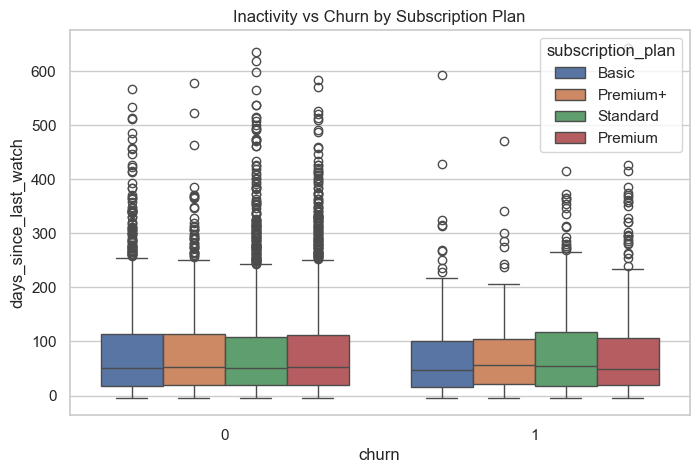

In [222]:
sns.boxplot(
    data=master_dat,
    x="churn",
    y="days_since_last_watch",
    hue="subscription_plan"
)
plt.title("Inactivity vs Churn by Subscription Plan")
plt.show()

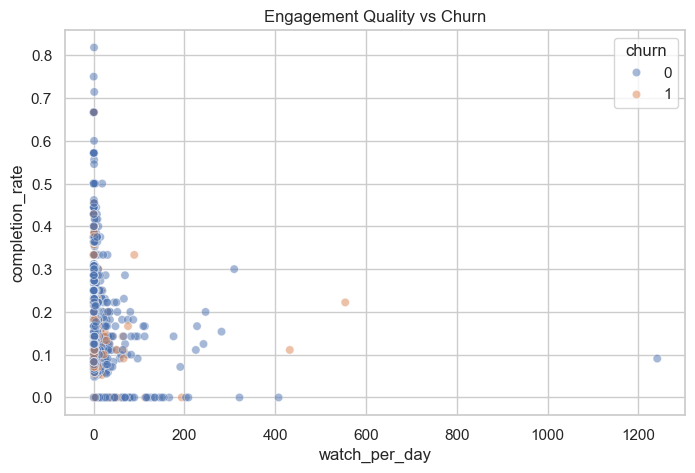

In [223]:
sns.scatterplot(
    data=master_dat,
    x="watch_per_day",
    y="completion_rate",
    hue="churn",
    alpha=0.5
)
plt.title("Engagement Quality vs Churn")
plt.show()


## Tuning Dataset for Modelling

In [238]:
master_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  8431 non-null   object        
 1   age                      8431 non-null   float64       
 2   gender                   8431 non-null   object        
 3   country                  8431 non-null   object        
 4   city                     8431 non-null   object        
 5   subscription_plan        8431 non-null   object        
 6   subscription_start_date  8431 non-null   datetime64[ns]
 7   is_active                8431 non-null   bool          
 8   monthly_spend            8431 non-null   float64       
 9   primary_device           8431 non-null   object        
 10  household_size           8431 non-null   float64       
 11  created_at               8431 non-null   datetime64[ns]
 12  tenure_days              8431 non-

# These columns cannot exist in a churn model:

- "user_id" since it is not relevant to churn analysis
- "is_active"	since it defines churn
- "last_watch" since it directly determines inactivity
- "last_watch_month" due to time leakage
- "subscription_start_date" due to time reference
- "created_at" due to time reference
- "city" since it is too granular, sparse

In [246]:
leakage_cols = ["user_id","city",
                "created_at","subscription_start_date",
                "last_watch","last_watch_month",
                "is_active"]
redundant_cols = ["total_watch_minutes", "median_session_minutes", "avg_progress"]
model_df = master_dat.drop(columns=leakage_cols+redundant_cols)
model_df = model_df.drop(columns="household_size")
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8431 entries, 0 to 8430
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    8431 non-null   float64 
 1   gender                 8431 non-null   object  
 2   country                8431 non-null   object  
 3   subscription_plan      8431 non-null   object  
 4   monthly_spend          8431 non-null   float64 
 5   primary_device         8431 non-null   object  
 6   tenure_days            8431 non-null   int64   
 7   churn                  8431 non-null   int64   
 8   avg_session_minutes    8431 non-null   float64 
 9   num_sessions           8431 non-null   int64   
 10  days_since_last_watch  8431 non-null   int64   
 11  completion_rate        8431 non-null   float64 
 12  watch_per_day          8431 non-null   float64 
 13  value_ratio            8431 non-null   float64 
 14  watch_bucket           8431 non-null   c

#### Optimized feature space by implementing Top-N category encoding for high-cardinality geographic data

In [247]:
top_countries = model_df['country'].value_counts().nlargest(5).index
model_df['country'] = model_df['country'].where(model_df['country'].isin(top_countries), 'Other')

#### Numeric features capture precise signal for ML, while bucketed features help model nonlinear behavior and make results interpretable for business stakeholders.

In [252]:
num_features_categories = [
    "age", "monthly_spend", "tenure_days",
    "avg_session_minutes", "num_sessions",
    "days_since_last_watch", "completion_rate",
    "watch_per_day", "value_ratio"
]

nominal_categories = [
    "gender", "subscription_plan",
    "primary_device", "country"
]

ordinal_categories = [
    "watch_bucket",
    "inactivity_bucket",
    "completion_bucket"
]

## Encoding of Dataset
- StandardScaler encoding for the numerical feature columns
- OneHetEncoder encoding for the nominal features of the dataset
- OridnalEncoder encoding for the ordinal categories for the bucket information of the dataset (ordered by meaning, so treat them as such)

In [260]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[
    ["Very Low", "Low", "High", "Very High"],            # watch_bucket 
    ["<1w", "1–2w", "2–4w", "1–2m", "2m+", "No Activity"],        # inactivity_bucket 
    ["Very Low", "Low", "Medium", "High", "No Data"]             # completion_bucket 
])

In [261]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_categories),
        ("nom", OneHotEncoder(handle_unknown="ignore"), nominal_categories),
        ("ord", ordinal_encoder, ordinal_categories)
    ]
)


## Logistic Reegression
#### Class Imbalance was managed in the pipeline configuration

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])


In [263]:
from sklearn.model_selection import train_test_split

df = model_df.copy()

y = df["churn"]
X = df.drop(columns=["churn"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [264]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'monthly_spend',
                                                   'tenure_days',
                                                   'avg_session_minutes',
                                                   'num_sessions',
                                                   'days_since_last_watch',
                                                   'completion_rate',
                                                   'watch_per_day',
                                                   'value_ratio']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'subscription_plan',
                                                   'primary_device',
                                                   'country']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['<1w',
                                                                              '1–2w',
                                                                              '2–4w',
                                                                              '1–2m',
                                                                              '2m+',
                                                                              'No '
                                                                              'Activity'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Medium',
                                                                              'High',
                                                                              'No '
                                                                              'Data']]),
                                                  ['watch_bucket',
                                                   'inactivity_bucket',
                                                   'completion_bucket'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [272]:
from sklearn.metrics import classification_report, roc_auc_score, auc

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.85      0.50      0.63      1437
           1       0.14      0.49      0.22       250

    accuracy                           0.50      1687
   macro avg       0.50      0.49      0.43      1687
weighted avg       0.74      0.50      0.57      1687

ROC-AUC: 0.4863048016701461


<Figure size 600x600 with 0 Axes>

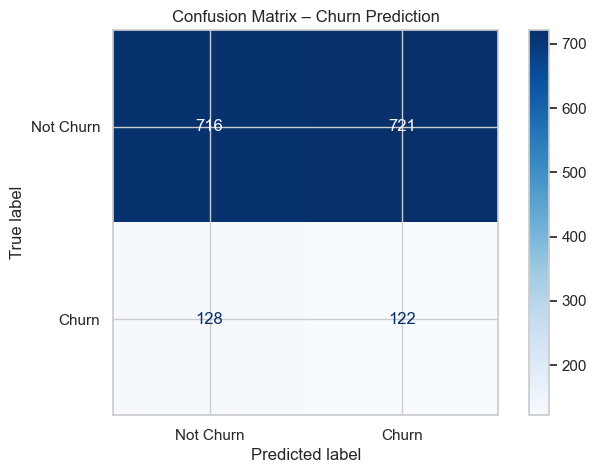

In [274]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Churn", "Churn"]
)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Churn Prediction")
plt.show()

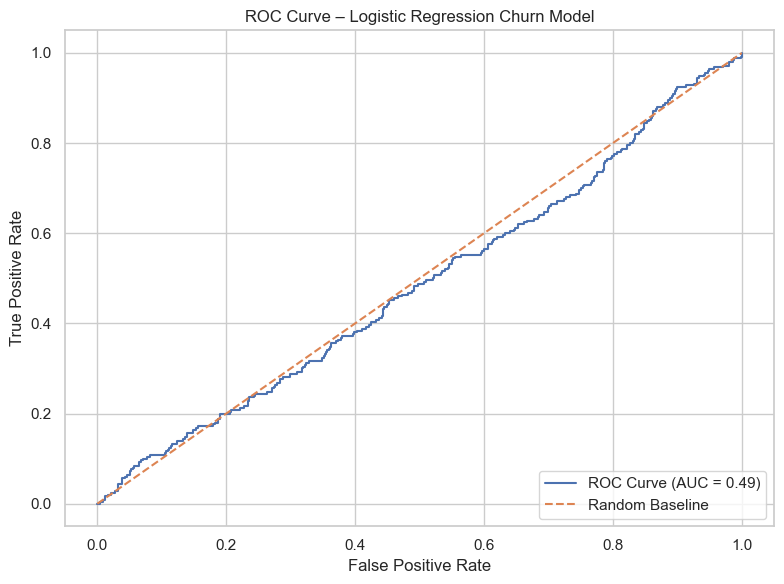

In [275]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression Churn Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


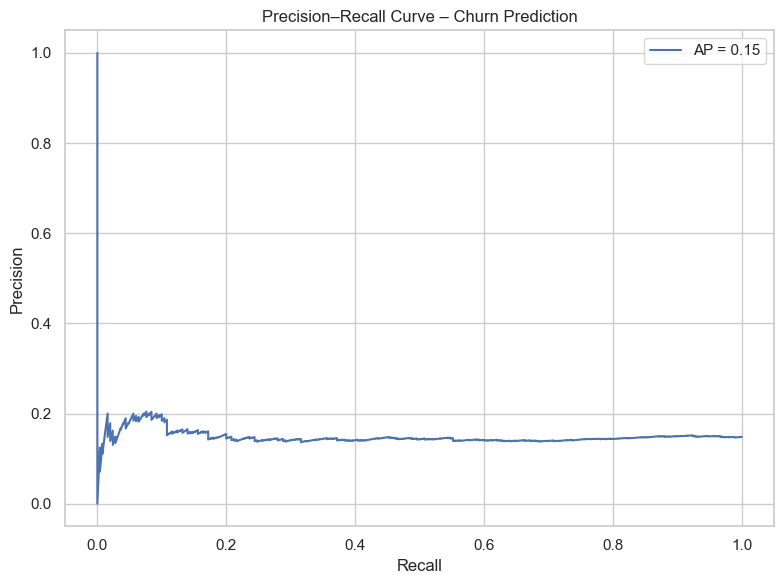

In [276]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP = {ap:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve – Churn Prediction")
plt.legend()
plt.tight_layout()
plt.show()


In [266]:
feature_names = model.named_steps["preprocess"].get_feature_names_out()

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": model.named_steps["clf"].coef_[0]
}).sort_values("coef", ascending=False)


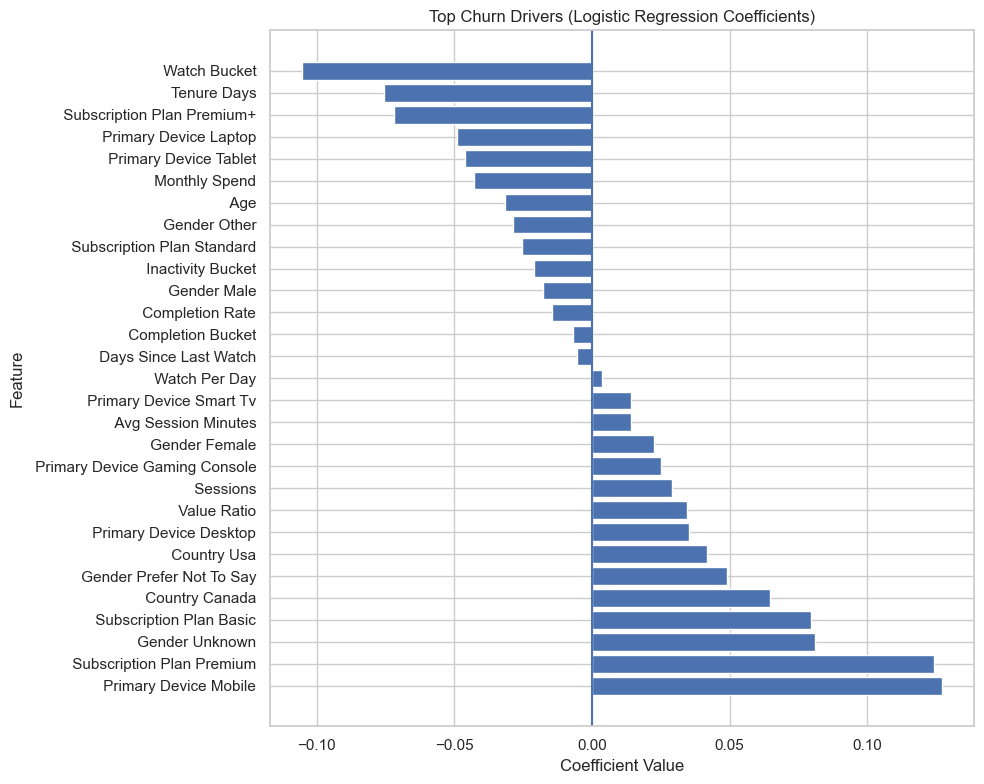

In [ ]:
top_n = 15

coef_plot_df = pd.concat([
    coef_df.head(top_n),
    coef_df.tail(top_n) 
])

def clean_feature_name(f):
    return (
        f.replace("num_", "")
         .replace("nom_", "")
         .replace("ord_", "")
         .replace("_", " ")
         .title()
    )

coef_plot_df["feature_clean"] = coef_plot_df["feature"].apply(clean_feature_name)

plt.figure(figsize=(10, 8))

plt.barh(
    coef_plot_df["feature_clean"],
    coef_plot_df["coef"]
)

plt.axvline(0) 

plt.title("Top Churn Drivers (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils import estimator_html_repr

with open("netflix_churn_pipeline.html", "w", encoding="utf-8") as f:
    f.write(estimator_html_repr(model))